In [1]:
#Data Handling
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
ca_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [4]:
data[ca_cols] = data[ca_cols].astype(object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 112.2+ KB


In [6]:
# categorical columns
cp = pd.get_dummies(data['cp'], prefix= 'cp', dtype='int')
thal = pd.get_dummies(data['thal'], prefix = 'thal', dtype='int')
slope = pd.get_dummies(data['slope'], prefix = 'slope', dtype='int')

#merge dummy variables to main data frame
frames = [data, cp, thal, slope]
df = pd.concat(frames, axis = 1)

#Dropping the unnecessory variables
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


In [7]:
x = df.drop(['target'],axis=1)
y = df['target']

In [8]:
#Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Modelsl
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb

#Evalutaion
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, roc_auc_score,
                recall_score, precision_score, f1_score, RocCurveDisplay, roc_curve, auc)
from sklearn.model_selection import GridSearchCV

In [9]:
seed = 13

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)

In [11]:
encoder = StandardScaler()
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [12]:
x_train.shape, x_test.shape

((717, 21), (308, 21))

In [13]:
df_category = data.copy()
df_category[ca_cols] = df_category[ca_cols].astype('category')
df_category.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [14]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1025 non-null   int64   
 1   sex       1025 non-null   category
 2   cp        1025 non-null   category
 3   trestbps  1025 non-null   int64   
 4   chol      1025 non-null   int64   
 5   fbs       1025 non-null   category
 6   restecg   1025 non-null   category
 7   thalach   1025 non-null   int64   
 8   exang     1025 non-null   category
 9   oldpeak   1025 non-null   float64 
 10  slope     1025 non-null   category
 11  ca        1025 non-null   category
 12  thal      1025 non-null   category
 13  target    1025 non-null   int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 57.4 KB


In [15]:
x_ca = df_category.drop(['target'], axis=1)
y_ca = df_category['target']

In [16]:
x_train_ca, x_test_ca, y_train_ca, y_test_ca = train_test_split(x_ca, y_ca, test_size = 0.3, random_state = 42, stratify = y_ca)

In [17]:
def evaluate(y_true, y_pred, prob):

  recall = recall_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  accuracy = accuracy_score(y_true, y_pred)
  auc = roc_auc_score(y_true, prob[:, 1])

  results = {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1, 'auc': auc}

  return results

In [18]:
def report(clf):
  #training evaluate
  y_train_pred = clf.predict(x_train)
  y_train_prob = clf.predict_proba(x_train)
  train_result = evaluate(y_train, y_train_pred, y_train_prob)
  print(train_result)

  #testing evaluate
  y_test_pred = clf.predict(x_test)
  y_test_prob = clf.predict_proba(x_test)
  test_result = evaluate(y_test, y_test_pred, y_test_prob)
  print(test_result)

In [19]:
def report_ca(clf):
  #training evaluate
  y_train_pred = clf.predict(x_train_ca)
  y_train_prob = clf.predict_proba(x_train_ca)
  train_result = evaluate(y_train_ca, y_train_pred, y_train_prob)
  print(train_result)

  #testing evaluate
  y_test_pred = clf.predict(x_test_ca)
  y_test_prob = clf.predict_proba(x_test_ca)
  test_result = evaluate(y_test_ca, y_test_pred, y_test_prob)
  print(test_result)

In [20]:
def gerneral_report(clf, x_train, y_train, x_test, y_test):
  #training evaluate
  y_train_pred = clf.predict(x_train)
  y_train_prob = clf.predict_proba(x_train)
  train_result = evaluate(y_train, y_train_pred, y_train_prob)
  print(train_result)

  #testing evaluate
  y_test_pred = clf.predict(x_test)
  y_test_prob = clf.predict_proba(x_test)
  test_result = evaluate(y_test, y_test_pred, y_test_prob)
  print(test_result)

In [ ]:
!pip install pymrmr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pymrmr: filename=pymrmr-0.1.11-cp310-cp310-linux_x86_64.whl size=390254 sha256=ef554a39b8e012886991217304175c9e4c9fcd3d804da85a562283c36d97763f
  Stored in directory: /root/.cache/pip/wheels/46/ae/55/4a2479c5f0de7eb363fe970cb18e4a750e03e4e63b1b5c2005
Successfully built pymrmr


In [ ]:
!pip install pyswarms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
data_f = data.copy()
x_f = data_f.drop(['target'],axis = 1)
y_f = data_f['target']

x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(x_f, y_f, test_size = 0.3, random_state = 42, stratify = y_f)

encoder2 = StandardScaler()
x_train_f = encoder2.fit_transform(x_train_f)
x_test_f = encoder2.transform(x_test_f)

In [ ]:
# applying only PSO for feature selection

import pyswarms as ps

# Define objective function

def f_per_particle(m, alpha):

    """Computes for the objective function per particle

    Inputs
    ------
    m : numpy.ndarray
        Binary mask that can be obtained from BinaryPSO, will
        be used to mask features.
    alpha: float (default is 0.5)
        Constant weight for trading-off classifier performance
        and number of features

    Returns
    -------
    numpy.ndarray
        Computed objective function
    """
    total_features = x_train_f.shape[1]

    # Get the subset of the features from the binary mask
    if np.count_nonzero(m) == 0:
        X_train_subset = x_train_f
        X_test_subset = x_test_f
    else:
        X_train_subset = x_train_f[:,m==1]
        X_test_subset = x_test_f[:,m==1]

    # Perform classification and store performance in P

    model = LogisticRegression(solver = 'liblinear', penalty = 'l1')

    model.fit(X_train_subset, y_train_f)
    y_pred = model.predict(X_test_subset)

    P = f1_score(y_pred, y_test)

    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_train_subset.shape[1] / total_features)))

    return j

In [ ]:
def f(x, alpha=0.88):

    """Higher-level method to do classification in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle

    """
    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]

    return np.array(j)

In [ ]:
# Initialize swarm, arbitrary

options = {'c1': 0.5, 'c2': 0.5, 'w':0.9, 'k': 30, 'p':2}

# Call instance of PSO

optimizer = ps.discrete.BinaryPSO(n_particles = 50, dimensions = x_train_f.shape[1], options=options)

# Perform optimization

cost, pos_justpso = optimizer.optimize(f, iters=50, verbose=2)


optimizer.reset()

2024-04-15 16:31:08,620 - pyswarms.discrete.binary - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9, 'k': 30, 'p': 2}
pyswarms.discrete.binary: 100%|██████████|50/50, best_cost=0.13
2024-04-15 16:31:17,241 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: 0.12978683966635776, best pos: [1 1 1 1 1 1 1 1 0 1 0 1 1]


In [ ]:
idx = [True if x == 1 else False for x in pos_justpso ]
print(idx)

[True, True, True, True, True, True, True, True, False, True, False, True, True]


In [ ]:
x_f.columns[idx]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'oldpeak', 'ca', 'thal'],
      dtype='object')

In [ ]:
cols = data.columns.to_list()
cols.remove('target')
cols = ['target'] + cols
print(cols)

['target', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [ ]:
import pymrmr

data2 = data[cols]

mr = pymrmr.mRMR(data2, 'MIQ', 11)

In [ ]:
print(mr)

['chol', 'exang', 'thal', 'ca', 'cp', 'slope', 'sex', 'oldpeak', 'thalach', 'restecg', 'trestbps']


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
pso_result = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'oldpeak', 'ca', 'thal']
mrmr_result = ['chol', 'exang', 'thal', 'ca', 'cp', 'slope', 'sex', 'oldpeak', 'thalach', 'restecg', 'trestbps']

In [ ]:
cols = pso_result + ['target']
data_pso = data.copy()

data_pso = data_pso[cols]
data_pso.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,ca,thal,target
0,52,1,0,125,212,0,1,168,1.0,2,3,0
1,53,1,0,140,203,1,0,155,3.1,0,3,0
2,70,1,0,145,174,0,1,125,2.6,0,3,0
3,61,1,0,148,203,0,1,161,0.0,1,3,0
4,62,0,0,138,294,1,1,106,1.9,3,2,0


In [ ]:
# categorical columns
cp = pd.get_dummies(data_pso['cp'], prefix= 'cp', dtype='int')
thal = pd.get_dummies(data_pso['thal'], prefix = 'thal', dtype='int')

#merge dummy variables to main data frame
frames = [data_pso, cp, thal]
df_pso = pd.concat(frames, axis = 1)

#Dropping the unnecessory variables
df_pso = df_pso.drop(columns = ['cp', 'thal'])
df_pso.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3
0,52,1,125,212,0,1,168,1.0,2,0,1,0,0,0,0,0,0,1
1,53,1,140,203,1,0,155,3.1,0,0,1,0,0,0,0,0,0,1
2,70,1,145,174,0,1,125,2.6,0,0,1,0,0,0,0,0,0,1
3,61,1,148,203,0,1,161,0.0,1,0,1,0,0,0,0,0,0,1
4,62,0,138,294,1,1,106,1.9,3,0,1,0,0,0,0,0,1,0


In [ ]:
x = df_pso.drop(['target'],axis=1)
y = df_pso['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
encoder_pso = StandardScaler()
x_train = encoder_pso.fit_transform(x_train)
x_test = encoder_pso.transform(x_test)

In [ ]:
x_train.shape, x_test.shape

((717, 17), (308, 17))

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors = 5)
knn1.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
gerneral_report(knn1, x_train, y_train, x_test, y_test)

{'accuracy': 0.9483960948396095, 'recall': 0.9347826086956522, 'precision': 0.9635854341736695, 'f1': 0.9489655172413793, 'auc': 0.9879002117852248}
{'accuracy': 0.8474025974025974, 'recall': 0.7848101265822784, 'precision': 0.9051094890510949, 'f1': 0.8406779661016949, 'auc': 0.9441139240506329}


In [ ]:
svm1 = SVC(C = 1, kernel = 'linear', max_iter = 1000, probability = True, random_state = seed)
svm1.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=1, kernel='linear', max_iter=1000, probability=True, random_state=13)

In [ ]:
gerneral_report(svm1, x_train, y_train, x_test, y_test)

{'accuracy': 0.8493723849372385, 'recall': 0.8994565217391305, 'precision': 0.8233830845771144, 'f1': 0.8597402597402598, 'auc': 0.9210009966363524}
{'accuracy': 0.8603896103896104, 'recall': 0.8987341772151899, 'precision': 0.8402366863905325, 'f1': 0.8685015290519877, 'auc': 0.9264135021097047}


In [ ]:
x_train_ca = x_train_ca[pso_result]
x_test_ca = x_test_ca[pso_result]

In [ ]:
x_train_ca.shape, x_test_ca.shape

((717, 11), (308, 11))

In [ ]:
lgbm1 = LGBMClassifier(learning_rate = 0.1, max_depth = 3, min_child_samples = 15,
            n_estimators = 200, subsample = 0.8)
lgbm1.fit(x_train_ca, y_train_ca)

[LightGBM] [Info] Number of positive: 368, number of negative: 349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 347
[LightGBM] [Info] Number of data points in the train set: 717, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513250 -> initscore=0.053011
[LightGBM] [Info] Start training from score 0.053011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier(max_depth=3, min_child_samples=15, n_estimators=200,
               subsample=0.8)

In [ ]:
gerneral_report(lgbm1, x_train_ca, y_train_ca, x_test_ca, y_test_ca)

{'accuracy': 0.99721059972106, 'recall': 1.0, 'precision': 0.9945945945945946, 'f1': 0.997289972899729, 'auc': 1.0}
{'accuracy': 0.974025974025974, 'recall': 0.9810126582278481, 'precision': 0.96875, 'f1': 0.9748427672955976, 'auc': 0.9968354430379747}


In [ ]:
cols = mrmr_result + ['target']
data_mrmr = data.copy()

data_mrmr = data_mrmr[cols]
data_mrmr.head()

,chol,exang,thal,ca,cp,slope,sex,oldpeak,thalach,restecg,trestbps,target
0,212,0,3,2,0,2,1,1.0,168,1,125,0
1,203,1,3,0,0,0,1,3.1,155,0,140,0
2,174,1,3,0,0,0,1,2.6,125,1,145,0
3,203,0,3,1,0,2,1,0.0,161,1,148,0
4,294,0,2,3,0,1,0,1.9,106,1,138,0


In [ ]:
# categorical columns
cp = pd.get_dummies(data_mrmr['cp'], prefix= 'cp', dtype='int')
thal = pd.get_dummies(data_mrmr['thal'], prefix = 'thal', dtype='int')
slope = pd.get_dummies(data_mrmr['slope'], prefix = 'slope', dtype='int')

#merge dummy variables to main data frame
frames = [data_mrmr, cp, thal, slope]
df_mrmr = pd.concat(frames, axis = 1)

#Dropping the unnecessory variables
df_mrmr = df_mrmr.drop(columns = ['cp', 'thal', 'slope'])
df_mrmr.head()

,chol,exang,ca,sex,oldpeak,thalach,restecg,trestbps,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,212,0,2,1,1.0,168,1,125,0,1,0,0,0,0,0,0,1,0,0,1
1,203,1,0,1,3.1,155,0,140,0,1,0,0,0,0,0,0,1,1,0,0
2,174,1,0,1,2.6,125,1,145,0,1,0,0,0,0,0,0,1,1,0,0
3,203,0,1,1,0.0,161,1,148,0,1,0,0,0,0,0,0,1,0,0,1
4,294,0,3,0,1.9,106,1,138,0,1,0,0,0,0,0,1,0,0,1,0


In [ ]:
x = df_mrmr.drop(['target'],axis=1)
y = df_mrmr['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
encoder_mrmr = StandardScaler()
x_train = encoder_mrmr.fit_transform(x_train)
x_test = encoder_mrmr.transform(x_test)

In [ ]:
x_train.shape, x_test.shape

((717, 19), (308, 19))

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 5)
knn2.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
gerneral_report(knn2, x_train, y_train, x_test, y_test)

{'accuracy': 0.9442119944211994, 'recall': 0.9347826086956522, 'precision': 0.9555555555555556, 'f1': 0.945054945054945, 'auc': 0.9883634919646194}
{'accuracy': 0.8538961038961039, 'recall': 0.8481012658227848, 'precision': 0.864516129032258, 'f1': 0.8562300319488818, 'auc': 0.9485232067510547}


In [ ]:
svm2 = SVC(C = 1, kernel = 'linear', max_iter = 1000, probability = True, random_state = seed)
svm2.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=1, kernel='linear', max_iter=1000, probability=True, random_state=13)

In [ ]:
gerneral_report(svm2, x_train, y_train, x_test, y_test)

{'accuracy': 0.8549511854951185, 'recall': 0.9239130434782609, 'precision': 0.8173076923076923, 'f1': 0.8673469387755101, 'auc': 0.9271287529587642}
{'accuracy': 0.8409090909090909, 'recall': 0.8924050632911392, 'precision': 0.815028901734104, 'f1': 0.851963746223565, 'auc': 0.9294936708860759}


In [ ]:
x_train_ca = x_train_ca[mrmr_result]
x_test_ca = x_test_ca[mrmr_result]

In [ ]:
lgbm2 = LGBMClassifier(learning_rate = 0.1, max_depth = 3, min_child_samples = 15,
            n_estimators = 200, subsample = 0.8)
lgbm2.fit(x_train_ca, y_train_ca)

[LightGBM] [Info] Number of positive: 368, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 310
[LightGBM] [Info] Number of data points in the train set: 717, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513250 -> initscore=0.053011
[LightGBM] [Info] Start training from score 0.053011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMClassifier(max_depth=3, min_child_samples=15, n_estimators=200,
               subsample=0.8)

In [ ]:
gerneral_report(lgbm2, x_train_ca, y_train_ca, x_test_ca, y_test_ca)

{'accuracy': 0.99860529986053, 'recall': 1.0, 'precision': 0.997289972899729, 'f1': 0.9986431478968791, 'auc': 0.999890992898966}
{'accuracy': 0.9707792207792207, 'recall': 0.9620253164556962, 'precision': 0.9806451612903225, 'f1': 0.9712460063897763, 'auc': 0.9931645569620253}


In [22]:
important_features = ['cp', 'thal', 'age', 'ca', 'oldpeak']

x_train_ca = x_train_ca[important_features]
x_test_ca = x_test_ca[important_features]

In [23]:
x_train_ca.head()

,cp,thal,age,ca,oldpeak
497,1,2,57,1,0.0
578,0,2,62,0,1.2
891,0,2,64,0,0.0
582,1,2,55,0,0.0
491,2,2,57,0,1.6


In [24]:
lgbm3 = LGBMClassifier(learning_rate = 0.1, max_depth = 3, min_child_samples = 15,
            n_estimators = 200, subsample = 0.8)
lgbm3.fit(x_train_ca, y_train_ca)

[LightGBM] [Info] Number of positive: 368, number of negative: 349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 717, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513250 -> initscore=0.053011
[LightGBM] [Info] Start training from score 0.053011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

LGBMClassifier(max_depth=3, min_child_samples=15, n_estimators=200,
               subsample=0.8)

In [25]:
gerneral_report(lgbm3, x_train_ca, y_train_ca, x_test_ca, y_test_ca)

{'accuracy': 0.9846582984658299, 'recall': 0.9755434782608695, 'precision': 0.9944598337950139, 'f1': 0.9849108367626885, 'auc': 0.9978860408620904}
{'accuracy': 0.9123376623376623, 'recall': 0.879746835443038, 'precision': 0.9455782312925171, 'f1': 0.9114754098360656, 'auc': 0.9806118143459915}


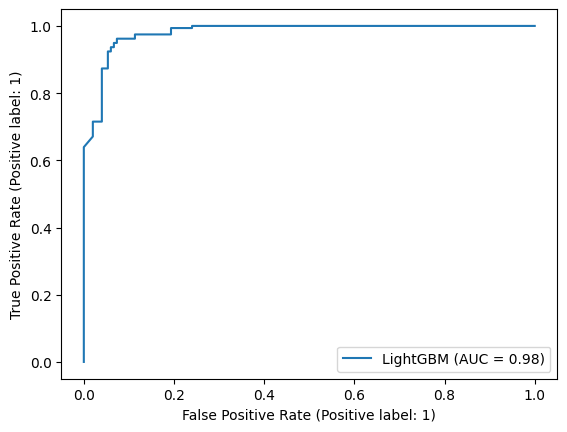

In [26]:
RocCurveDisplay.from_estimator(lgbm3, x_test_ca, y_test_ca, name = 'LightGBM')

In [ ]:
|